In [1]:
# MD simulation of alanine dipeptide at 300K
# import modules
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

# load trajectory file
traj = md.load('/home/ac7407/comp-class/comp-lab-class/Week5/T300/adp.trr', top='/home/ac7407/comp-class/comp-lab-class/Week5/T300/adp.gro')

# compute phi and psi dihedral angles at each frame
phi = md.compute_phi(traj)
psi = md.compute_psi(traj)


/home/ac7407/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/ac7407/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/ac7407/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/ac7407/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


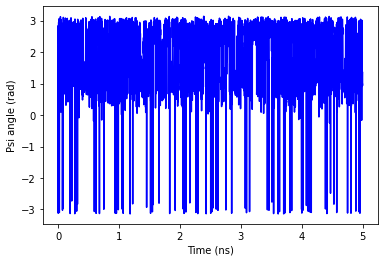

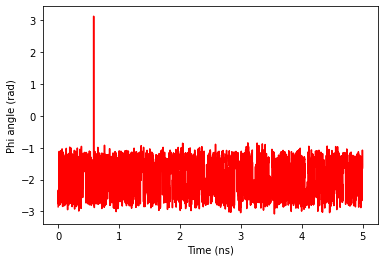

In [2]:
# plot psi angle vs time (in ns)
import matplotlib.pyplot as plt
plt.plot(traj.time/1000, psi[1], color='blue')
plt.xlabel('Time (ns)')
plt.ylabel('Psi angle (rad)')
plt.show()

# plot phi angle vs time (in ns)
plt.plot(traj.time/1000, phi[1], color='red')
plt.xlabel('Time (ns)')
plt.ylabel('Phi angle (rad)')
plt.show()

<ipython-input-3-2e9482999b58>:3: RuntimeWarning: divide by zero encountered in log
  fes = -np.log(hist)


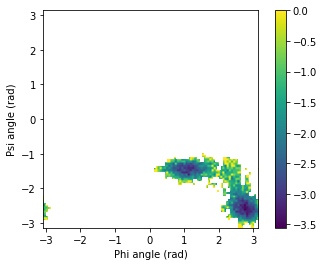

In [3]:
# plot 2D histogram of phi and psi angles and take negative log of the histogram
hist, xedges, yedges = np.histogram2d(phi[1][:,0], psi[1][:,0], bins=100)
fes = -np.log(hist)

plt.imshow(fes, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.xlabel('Phi angle (rad)')
plt.ylabel('Psi angle (rad)')
plt.colorbar()
plt.show()



<ipython-input-4-562aad2754a0>:12: RuntimeWarning: divide by zero encountered in log
  fes = -np.log(hist)


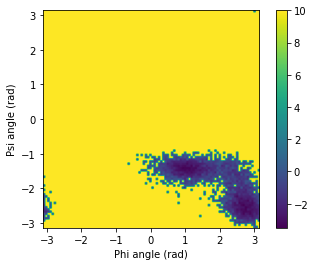

In [4]:
# plot free energy surface in phi/psi space (compute 2d histogram) and plot the log of the histogram
# load trajectory file
traj = md.load('/home/ac7407/comp-class/comp-lab-class/Week5/T300/adp_exchange4temps.trr', top='/home/ac7407/comp-class/comp-lab-class/Week5/T300/adp_exchange4temps.gro')

# compute phi and psi dihedral angles for each frame
phi = md.compute_phi(traj)
psi = md.compute_psi(traj)

# create 2d histogram of psi and phi angles using np.histogram2d
# use 100 bins in each dimension
hist, xedges, yedges = np.histogram2d(phi[1][:,0], psi[1][:,0], bins=100)
fes = -np.log(hist)

# set maximum free energy to 10 kT
fes[fes>10] = 10

# plot free energy surface
plt.imshow(fes, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.xlabel('Phi angle (rad)')
plt.ylabel('Psi angle (rad)')
plt.colorbar()
plt.show()


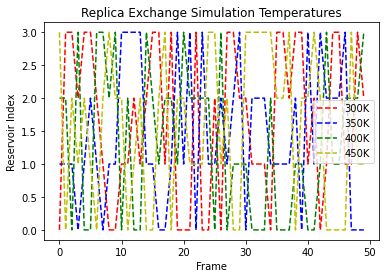

In [5]:
# create temperature replica exchange simulation plots
# open replica_temp.xvg file
with open('/home/ac7407/comp-class/comp-lab-class/Week5/T300/replica_temp.xvg', 'r') as f:
    lines = f.readlines()

# create lists for time and each replica
time = []
replica1 = []
replica2 = []
replica3 = []
replica4 = []

# iterate every 1000th line (100 ps) and append data to lists
for i in range(0, len(lines), 1000):
    time.append(float(lines[i].split()[0]))
    replica1.append(float(lines[i].split()[1]))
    replica2.append(float(lines[i].split()[2]))
    replica3.append(float(lines[i].split()[3]))
    replica4.append(float(lines[i].split()[4]))

# plot temperatures for each replica vs time (ps), dotted lines and different colors
plt.plot(replica1, 'r--', label='300K')
plt.plot(replica2, 'b--', label='350K')
plt.plot(replica3, 'g--', label='400K')
plt.plot(replica4, 'y--', label='450K')
plt.title('Replica Exchange Simulation Temperatures')
plt.xlabel('Frame')
plt.ylabel('Reservoir Index')
plt.legend()
plt.show()


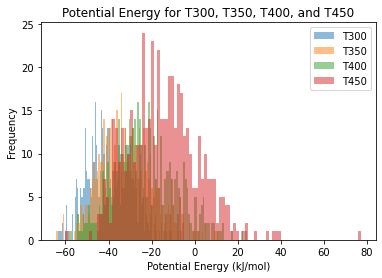

In [6]:
# compute histogram of potential energy for each replica
# open potential.xvg file from /home/ac7407/comp-class/comp-lab-class/Week5/T300 directory
with open('/home/ac7407/comp-class/comp-lab-class/Week5/T300/potential.xvg', 'r') as f:

    # read file from line 25
    lines = f.readlines()[25:]

# open potential.xvg file from /home/ac7407/comp-class/comp-lab-class/Week5/T350 directory
with open('/home/ac7407/comp-class/comp-lab-class/Week5/T350/potential.xvg', 'r') as f:
    
    # read file from line 25
    lines2 = f.readlines()[25:]

# open potential.xvg file from /home/ac7407/comp-class/comp-lab-class/Week5/T400 directory
with open('/home/ac7407/comp-class/comp-lab-class/Week5/T400/potential.xvg', 'r') as f:

    # read file from line 25
    lines3 = f.readlines()[25:]

# open potential.xvg file from /home/ac7407/comp-class/comp-lab-class/Week5/T450 directory
with open('/home/ac7407/comp-class/comp-lab-class/Week5/T450/potential.xvg', 'r') as f:
    
    # read file from line 25
    lines4 = f.readlines()[25:]

# plot histogram of potential energy for T300, T350, T400, and T450
plt.hist([float(line.split()[1]) for line in lines], bins=100, alpha=0.5, label='T300')
plt.hist([float(line.split()[1]) for line in lines2], bins=100, alpha=0.5, label='T350')
plt.hist([float(line.split()[1]) for line in lines3], bins=100, alpha=0.5, label='T400')
plt.hist([float(line.split()[1]) for line in lines4], bins=100, alpha=0.5, label='T450')
plt.legend(loc='upper right')
plt.xlabel('Potential Energy (kJ/mol)')
plt.ylabel('Frequency')
plt.title('Potential Energy for T300, T350, T400, and T450')
plt.show()